In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import weibull_min
np.random.seed(0)

In [4]:
df = pd.read_csv("empirical_blades_retired_per_year.csv")
df.head()

,Year,Blades.Retired.Per.Year
0,2020,3622
1,2021,8998
2,2022,4756
3,2023,6832
4,2024,4360


In [5]:
blades_retired_per_year = df["Blades.Retired.Per.Year"].values

Text(0.5, 1.0, 'Blades Retired Per Year')

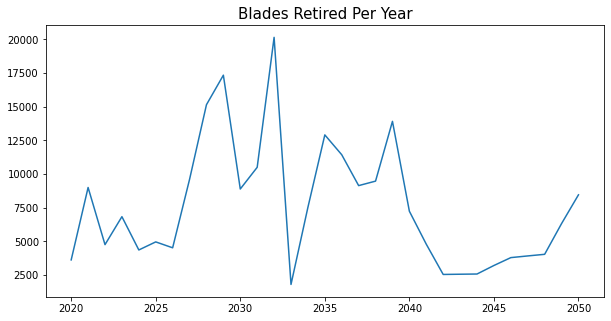

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
xs = np.arange(len(blades_retired_per_year))
ax.plot(xs + 2020, blades_retired_per_year)
ax.set_title("Blades Retired Per Year", fontsize=15)

In [7]:
cumulative_blades_retired_per_year = np.cumsum(blades_retired_per_year)

Text(0.5, 1.0, 'Cumulative Blades Retired Per Year')

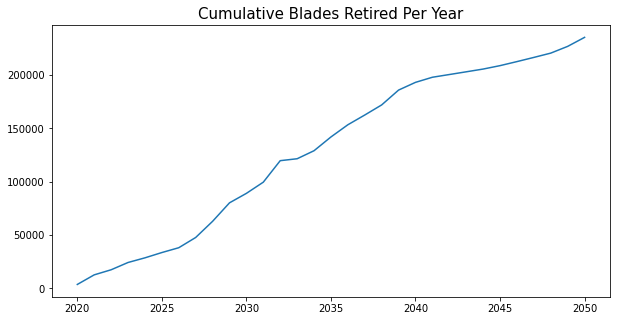

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
xs = np.arange(len(cumulative_blades_retired_per_year))
ax.plot(xs + 2020, cumulative_blades_retired_per_year)
ax.set_title("Cumulative Blades Retired Per Year", fontsize=15)

Text(0.5, 1.0, 'Normalized Cumulative Blades Retired Per Year')

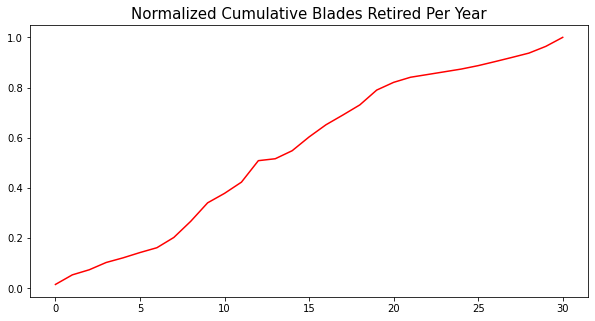

In [9]:
normalized_cumulative_blades_retired_per_year = cumulative_blades_retired_per_year / cumulative_blades_retired_per_year.max()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
xs = np.arange(len(normalized_cumulative_blades_retired_per_year))
ax.plot(xs, normalized_cumulative_blades_retired_per_year, color="r")
ax.set_title("Normalized Cumulative Blades Retired Per Year", fontsize=15)

In [10]:
def weibull_pdf(x, k, l):
    y = (k / l) * (x / l) ** (k - 1) * exp(-(x / l) ** k)
    return y

def weibull_cdf(x, k, l):
    y = 1 - exp(-(x / l) ** k)
    return y

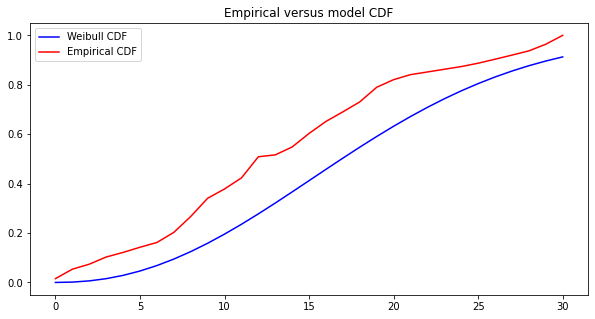

In [11]:
k = 2.2
l = 20
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
xs = np.arange(len(normalized_cumulative_blades_retired_per_year))
ys = np.array([weibull_cdf(x, k, l) for x in xs])
ax.plot(xs, ys, label="Weibull CDF", color="b")
ax.plot(xs, normalized_cumulative_blades_retired_per_year, color="r", label="Empirical CDF")
ax.set_title("Empirical versus model CDF")
ax.legend(loc="best")

Text(0.5, 1.0, 'Weibull PDF')

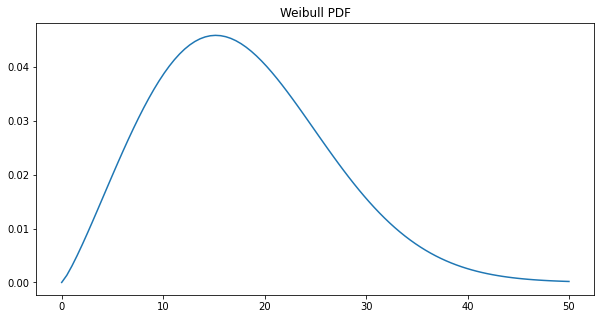

In [12]:
xs = np.linspace(0, 50, 100)
ys = [weibull_pdf(x, k, l) for x in xs]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(xs, ys)
ax.set_title("Weibull PDF")

In [16]:
# Reassigning k and l from above

n = 1000     # number of samples
# k = 2     # shape
# l = 23   # scale

draws = weibull_min.rvs(k, loc=0, scale=l, size=n)

(array([ 2.,  1.,  4.,  4.,  4.,  6.,  9.,  6.,  9., 12.,  9.,  9.,  9.,
         8., 23., 18., 15., 20., 16., 14., 22., 12., 13., 12., 22., 24.,
        28., 14., 21., 15., 18., 23., 15., 17., 22., 17., 22., 17., 19.,
        18., 14., 22., 17., 18., 13., 20., 23., 10., 13., 13., 21., 15.,
        19., 12., 14., 10., 13.,  8.,  9.,  9., 14.,  7.,  6.,  6.,  5.,
         9.,  4.,  4., 12.,  5.,  1., 12.,  5.,  7.,  6.,  2.,  2.,  0.,
         4.,  1., 10.,  2.,  0.,  1.,  2.,  2.,  0.,  1.,  0.,  1.,  0.,
         0.,  2.,  0.,  0.,  0.,  0.,  2.,  1.,  2.]),
 array([ 0.54920647,  1.01268716,  1.47616785,  1.93964854,  2.40312922,
         2.86660991,  3.3300906 ,  3.79357129,  4.25705197,  4.72053266,
         5.18401335,  5.64749404,  6.11097472,  6.57445541,  7.0379361 ,
         7.50141678,  7.96489747,  8.42837816,  8.89185885,  9.35533953,
         9.81882022, 10.28230091, 10.7457816 , 11.20926228, 11.67274297,
        12.13622366, 12.59970434, 13.06318503, 13.52666572, 13.990146

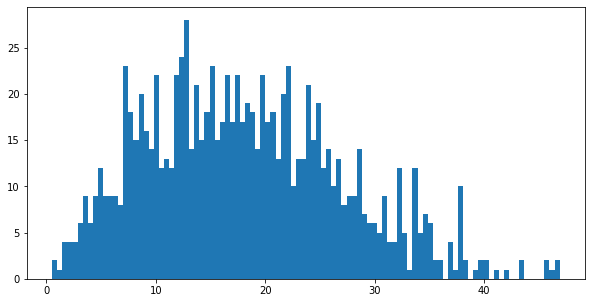

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.hist(draws, bins=100)

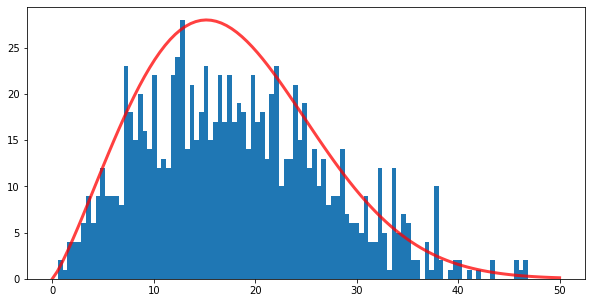

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
count, _, _ = ax.hist(draws, bins=100)
ys = np.array([weibull_pdf(x, k, l) for x in xs])
scale = count.max() / ys.max()
ax.plot(xs, ys * scale, color="r", ls="-", alpha=0.75, lw=3)